In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
#list files in directory:
results_dir = 'results-main'

In [ ]:
for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
big_perf_df = pd.concat(df_results_list)

big_perf_df = big_perf_df[big_perf_df['type'] == 'fit time']
# replace 'ICP+DT' by ICP
big_perf_df['algo'] = big_perf_df['algo'].replace({'ICP+DT': 'ICP', 'ICSCMnopruning': 'ICSCM w/o pruning'})

algos_to_keep_fig4 = ['SCM', 'DT', 'ICP', 'ICSCM']
algos_to_keep_fig_appendix = ['SCM', 'DT', 'ICP', 'ICSCM', 'ICSCM w/o pruning']

df_fig4 = big_perf_df[big_perf_df['algo'].isin(algos_to_keep_fig4)]

# check the number of splits
for algo in df_fig4['algo'].unique():
    algo_df = df_fig4[df_fig4['algo'] == algo].copy()
    for n in algo_df['n_var'].unique():
        loc_df = algo_df[algo_df['n_var'] == n].copy()
        n_splits = len(loc_df['split'].unique())
        print(f'{algo} with {n} vars has {n_splits} splits')
        #if n_splits < 100:
        #    raise ValueError('incomplete experiment', n_splits, 'where 100 are expected')
        #    remove all the values for algo and n_var
        #    df_fig4 = df_fig4[~((df_fig4['algo'] == algo) & (df_fig4['n_var'] == n))]


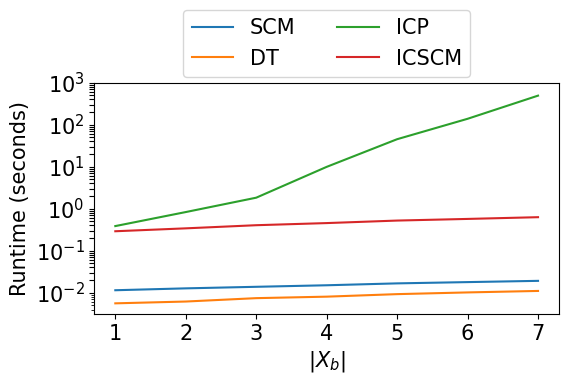

In [15]:
#figure size:
plt.figure(figsize=(6, 3))
plt.rcParams.update({'font.size': 15})
sns.lineplot(data=df_fig4, x='n_var', y='score', hue='algo', hue_order=algos_to_keep_fig4, markers=True, dashes=False, errorbar=None)
plt.ylabel('Runtime (seconds)')
plt.xlabel('$|X_b|$')
plt.yscale('log')

# legend above the fig : 
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.17), ncol=2, fancybox=True, shadow=False)
plt.xticks(sorted(list(set(df_fig4['n_var']))))
a = []
for b in np.array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]):
    a.extend(np.arange(1*b, 10*b, b))
a.append(1.e+03)
plt.yticks(a)
plt.savefig('figures/runtime.pdf', bbox_inches='tight')
plt.show()


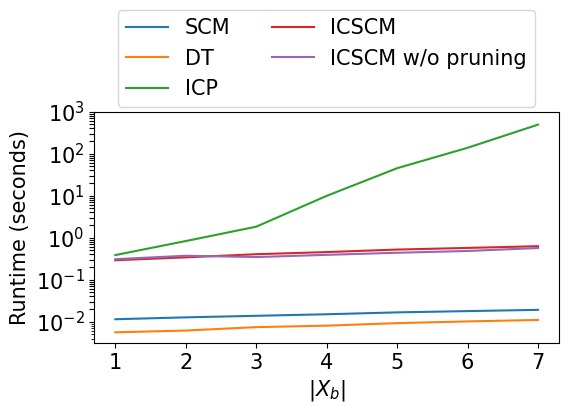

In [17]:
df_appendix = big_perf_df[big_perf_df['algo'].isin(algos_to_keep_fig_appendix)]

#figure size:
plt.figure(figsize=(6, 3))
plt.rcParams.update({'font.size': 15})
sns.lineplot(data=df_appendix, x='n_var', y='score', hue='algo', hue_order=algos_to_keep_fig_appendix, markers=True, dashes=False, errorbar=None)
plt.ylabel('Runtime (seconds)')
plt.xlabel('$|X_b|$')
plt.yscale('log')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.23), ncol=2, fancybox=True, shadow=False)
plt.xticks(sorted(list(set(df_appendix['n_var']))))
a = []
for b in np.array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]):
    a.extend(np.arange(1*b, 10*b, b))
a.append(1.e+03)
plt.yticks(a)
plt.savefig('figures/pruning_runtime.pdf', bbox_inches='tight')
plt.show()
